In [1]:
from denoising_diffusion_pytorch.my_denoising_diffusion_pytorch import *

/Users/chocho/Library/r-miniconda-arm64/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/Users/chocho/Library/r-miniconda-arm64/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [2]:
ds = MyDataset(
  "/Users/chocho/Library/CloudStorage/GoogleDrive-kycho@math.ncu.edu.tw/我的雲端硬碟/github/DM-code/images",
  image_size=64
)

In [3]:
diffusion = GaussianDiffusion(
  model = Unet(dim=64, dim_mults=(1, 2, 4, 8)),
  timesteps=200,
  image_size=ds.image_size,
)

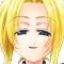

In [4]:
ds.img(13)

In [5]:
# @add_to_class(GaussianDiffusion)
# def forward_backwrad_process(self, ds:Dataset, num_timesteps:int, b:int=7, contains_backward=True):
#     """
#     x_start with shape (b, w, h, c)
#     """
#     with torch.inference_mode():
#         _ = DataLoader(ds,batch_size=b,shuffle=True)
#         _ = next(iter(_))
#         x_start = _.clone()
#         xt_list = [] 
#         xt_list.append(unnormalize_to_zero_to_one(x_start))
#         x_t = x_start.to(self.device)
#         for t in range(num_timesteps):
#             noise_t = torch.randn_like(x_t)
#             x_t = torch.sqrt(1-self.betas[t]) * x_t + torch.sqrt(self.betas[t]) * noise_t
#             xt_list.append(unnormalize_to_zero_to_one(x_t))
#         for t in tqdm(reversed(range(0, num_timesteps)), desc = 'Backward process', total = num_timesteps):
#             x_t, _ = self.p_sample(x_t, t)
#             xt_list.append(unnormalize_to_zero_to_one(x_t))
#         xt_list = [ i.permute(0,2,3,1).cpu().clamp(0,1) for i in xt_list ]

#         def update(frame):
#             img0.set_array(xt_list[frame][0])
#             img1.set_array(xt_list[frame][1])
#             img2.set_array(xt_list[frame][2])
#             img3.set_array(xt_list[frame][3])
#             img4.set_array(xt_list[frame][4])
#             img5.set_array(xt_list[frame][5])
#             img6.set_array(xt_list[frame][6])

#             if frame < num_timesteps:
#                 ax3.set_title(f'Forward process, t={frame}')
#                 return img0, img1, img2, img3, img4, img5, img6, 
#             else:
#                 ax3.set_title(f'Backward process, t={2*num_timesteps -frame}')
#                 return img0, img1, img2, img3, img4, img5, img6, 
        
#         fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=7, figsize=(12,2))
#         fig.subplots_adjust(left=0.01, bottom=0.1, right=0.99, top=0.9, wspace=0.1)
#         img0 = ax0.imshow(xt_list[0][0])
#         img1 = ax1.imshow(xt_list[0][1])
#         img2 = ax2.imshow(xt_list[0][2])
#         img3 = ax3.imshow(xt_list[0][3])
#         img4 = ax4.imshow(xt_list[0][4])
#         img5 = ax5.imshow(xt_list[0][5])
#         img6 = ax6.imshow(xt_list[0][6])
        
#         ax3.set_title('Forward and Backward process, t=0')
#         animation = FuncAnimation(fig, update, frames=len(xt_list), interval = 100, blit = True)
#         # if save_gif_path:
#         #     animation.save(filename=save_gif_path, writer="pillow")
#         display(HTML(animation.to_jshtml()))
#         plt.close()

Backward process:   0%|          | 0/6 [00:00<?, ?it/s]

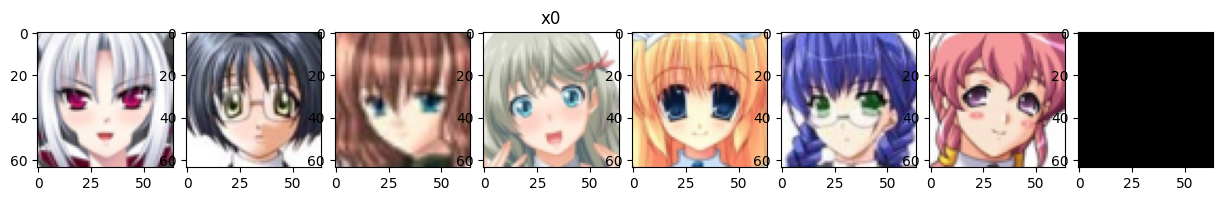

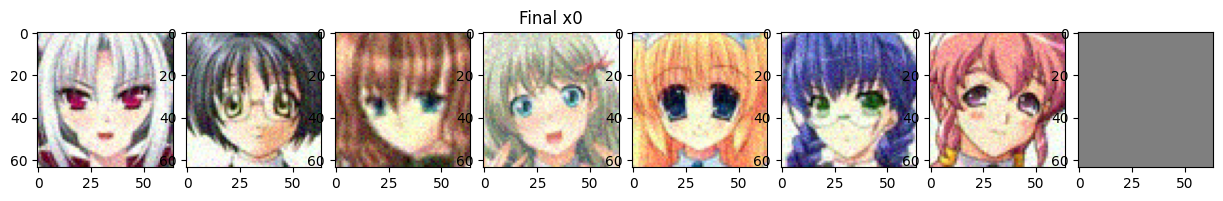

In [6]:
diffusion.forward_backwrad_process(ds,num_timesteps=6, n=3)

In [13]:
10 // 2

5

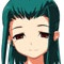

In [7]:
x0 = ds[0]
diffusion = GaussianDiffusion(
  model = Unet(dim=64, dim_mults=(1, 2, 4, 8)),
  timesteps=200,
  image_size=x0.shape[1],
)
display(tensor2pil(unnormalize_to_zero_to_one(x0)))

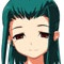

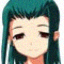

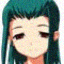

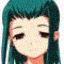

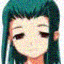

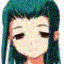

In [9]:
import torch
t = 50
xt = x0
display(tensor2pil(unnormalize_to_zero_to_one(x0)))
for i in range(0,t,10):
  noise = torch.randn_like(x0)
  xt = torch.sqrt(1 - diffusion.betas[i]) * xt + torch.sqrt(diffusion.betas[i]) * noise
  display(tensor2pil(unnormalize_to_zero_to_one(xt)))
# xt = diffusion.q_sample(
#   x0.unsqueeze(0),
#   t=torch.tensor([t]),
#   )
# tensor2pil(unnormalize_to_zero_to_one(xt[0]))